In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib as  mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams[u'font.sans-serif'] = ['simhei']
mpl.rcParams['axes.unicode_minus'] = False

## 1.加载原始数据

In [ ]:
%%time
input_dir = '../preprocess_data_new/'
output_dir = '../preprocess_data_new/'
train_ax = joblib.load(input_dir + 'train_ax.lz4')
valid = joblib.load(input_dir + 'valid.lz4')
test = joblib.load(input_dir + 'test.lz4')

train_y = joblib.load(input_dir + 'train_y_33465.lz4')

## 2.查看样本缺失值的分布

In [ ]:
%%time
# 统计缺失值数量,得到指示缺失的布尔矩阵
null_matrix_tra = train_ax.isnull()
null_matrix_val = valid.isnull()
null_matrix_test = test.isnull()
row_null_sum_tra = null_matrix_tra.sum(axis=1)
row_null_sum_val = null_matrix_val.sum(axis=1)
row_null_sum_test = null_matrix_test.sum(axis=1)
null_matrix_dict = {
    'null_matrix_tra': null_matrix_tra,
    'null_matrix_val': null_matrix_val,
    'null_matrix_test': null_matrix_test
}

joblib.dump(null_matrix_dict, output_dir + 'null_matrix_dict')

In [ ]:
row_null_cnt_sort_tra = row_null_sum_tra.value_counts().sort_index()
row_null_cnt_sort_val = row_null_sum_val.value_counts().sort_index()
row_null_cnt_sort_test = row_null_sum_test.value_counts().sort_index()

In [ ]:
plt.figure(figsize=(20,15))
# train集的缺失值数量分布
plt.subplot(221)

# 分桶显示代码
# xpos = [800,593,1493,23,3000]
# plt.vlines(x=xpos[0],ymin=0,ymax=0.001,colors='red')
# plt.vlines(x=xpos[1],ymin=0,ymax=0.001,colors='red')
# plt.vlines(x=xpos[2],ymin=0,ymax=0.001,colors='red')
# plt.vlines(x=xpos[3],ymin=0,ymax=0.001,colors='red')
# plt.vlines(x=xpos[4],ymin=0,ymax=0.0019,colors='forestgreen')
plt.hlines(y=0,xmin=0,xmax=5000,colors='red')
plt.vlines(x=3000,ymin=0,ymax=0.0019,colors='forestgreen')

plt.scatter(row_null_cnt_sort_tra.index, row_null_cnt_sort_tra/100000,s=3,alpha=0.8)
plt.title(s = 'train集缺失值数量的分布',fontdict = {'fontsize':20})
plt.ylabel(s = '缺失值对应的样本数量占比',fontdict = {'fontsize':15})
plt.xlabel(s = '缺失值数量', fontdict = {'fontsize':15})

# valid集的缺失值数量分布
plt.subplot(222)

plt.hlines(y=0,xmin=0,xmax=5000,colors='red')
plt.vlines(x=3000,ymin=0,ymax=0.0019,colors='forestgreen')

plt.scatter(row_null_cnt_sort_val.index, row_null_cnt_sort_val/20000,s=3,alpha=0.8)
plt.title(s = 'valid集缺失值数量的分布',fontdict = {'fontsize':20})
plt.ylabel(s = '缺失值对应的样本数量占比',fontdict = {'fontsize':15})
plt.xlabel(s = '缺失值数量', fontdict = {'fontsize':15})


# test集的缺失值数量分布
plt.subplot(223)

plt.hlines(y=0,xmin=0,xmax=5000,colors='red')
plt.vlines(x=3000,ymin=0,ymax=0.0019,colors='forestgreen')

plt.scatter(row_null_cnt_sort_test.index, row_null_cnt_sort_test/20000,s=3,alpha=0.8)
plt.title(s = 'test集缺失值数量的分布',fontdict = {'fontsize':20})
plt.ylabel(s = '缺失值对应的样本数量占比',fontdict = {'fontsize':15})
plt.xlabel(s = '缺失值数量', fontdict = {'fontsize':15})

plt.subplot(224)
plt.scatter(row_null_cnt_sort_tra.index, row_null_cnt_sort_tra/100000,s=3,alpha=0.7, c='g')
plt.scatter(row_null_cnt_sort_val.index, row_null_cnt_sort_val/20000,s=3,alpha=0.3, c='r')
plt.title(s = 'train和valid缺失值数量的分布重合图',fontdict = {'fontsize':20})
plt.ylabel(s = '缺失值对应的样本数量占比',fontdict = {'fontsize':15})
plt.xlabel(s = '缺失值数量', fontdict = {'fontsize':15})


In [13]:
from scipy import stats
stats.ks_2samp(row_null_cnt_sort_tra,row_null_cnt_sort_val)

Ks_2sampResult(statistic=0.49278565491054854, pvalue=5.541746361964754e-228)

In [14]:
# valid和test同源同分布
stats.ks_2samp(row_null_cnt_sort_val,row_null_cnt_sort_test)

Ks_2sampResult(statistic=0.018146527948105784, pvalue=0.8999904679208379)

## 3.查看样本每一维缺失率情况

In [3]:
intput_dir = '../preprocess_data_new/'
null_matrix_dict = joblib.load(intput_dir + 'null_matrix_dict')

In [5]:
col_null_sum_tra = null_matrix_dict['null_matrix_tra'].sum(axis=0)
col_null_sum_val = null_matrix_dict['null_matrix_val'].sum(axis=0)
col_null_sum_test = null_matrix_dict['null_matrix_test'].sum(axis=0)

In [15]:
col_null_sort_tra = col_null_sum_tra.sort_values()
col_null_sort_val = col_null_sum_val.sort_values()
col_null_sort_test = col_null_sum_test.sort_values()

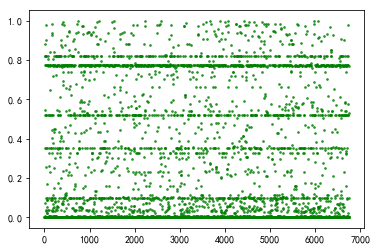

In [6]:
plt.scatter(range(col_null_sum_tra.shape[0]), col_null_sum_tra/100000,s=3,alpha=0.7, c='g')

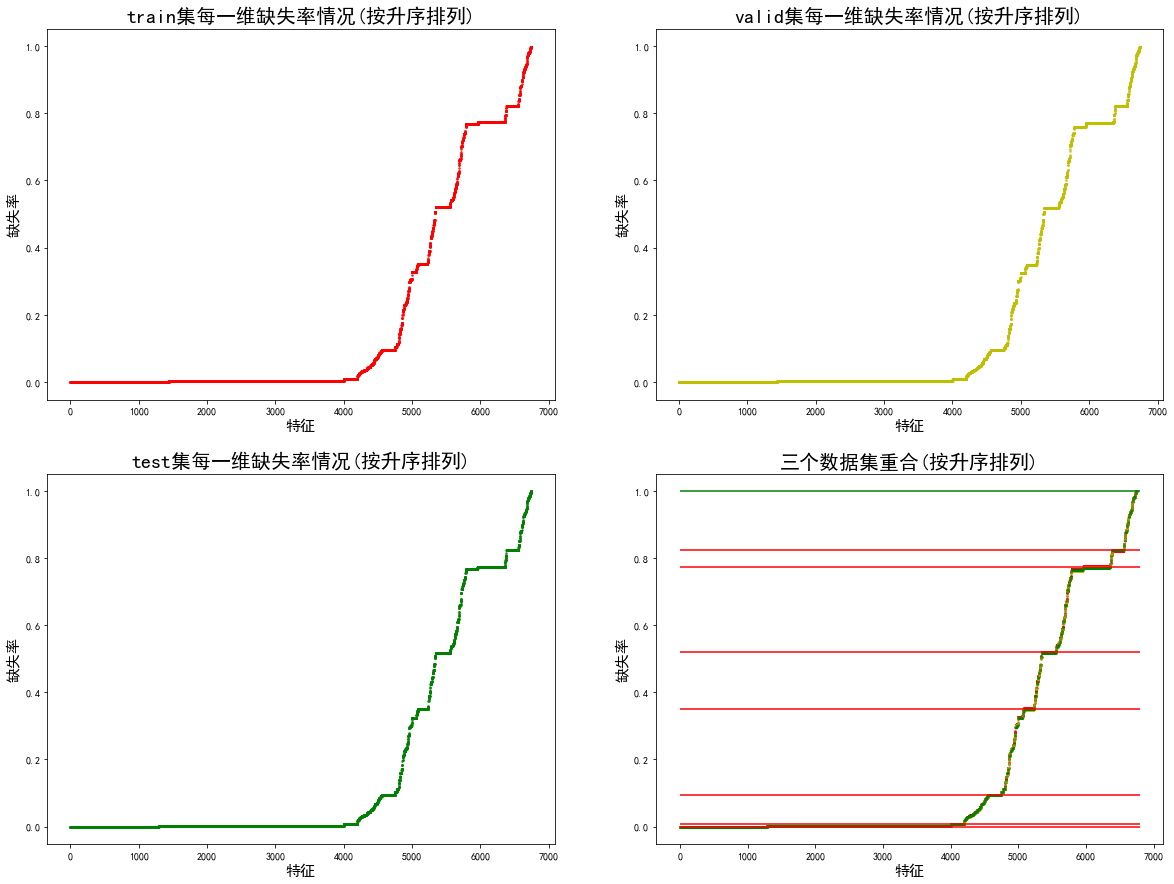

In [30]:
plt.figure(figsize=(20,15))

plt.subplot(221)
plt.title(s = 'train集每一维缺失率情况(按升序排列)',fontdict = {'fontsize':20})
plt.ylabel(s = '缺失率',fontdict = {'fontsize':15})
plt.xlabel(s = '特征', fontdict = {'fontsize':15})

plt.scatter(range(col_null_sort_tra.shape[0]), col_null_sort_tra/100000,s=3,alpha=0.7, c='r')

plt.subplot(222)
plt.title(s = 'valid集每一维缺失率情况(按升序排列)',fontdict = {'fontsize':20})
plt.ylabel(s = '缺失率',fontdict = {'fontsize':15})
plt.xlabel(s = '特征', fontdict = {'fontsize':15})
plt.scatter(range(col_null_sort_val.shape[0]), col_null_sort_val/20000,s=3,alpha=0.7, c='y')

plt.subplot(223)
plt.title(s = 'test集每一维缺失率情况(按升序排列)',fontdict = {'fontsize':20})
plt.ylabel(s = '缺失率',fontdict = {'fontsize':15})
plt.xlabel(s = '特征', fontdict = {'fontsize':15})
plt.scatter(range(col_null_sort_test.shape[0]), col_null_sort_test/20000,s=3,alpha=0.7, c='g')

plt.subplot(224)
plt.title(s = '三个数据集重合(按升序排列)',fontdict = {'fontsize':20})
plt.ylabel(s = '缺失率',fontdict = {'fontsize':15})
plt.xlabel(s = '特征', fontdict = {'fontsize':15})

y_pos = [0.0, 0.00767, 0.09443, 0.35144, 0.51962, 0.77360, 0.825, 1.0]
plt.hlines(y=y_pos[0],xmin=0,xmax=6800,colors='red')
plt.hlines(y=y_pos[1],xmin=0,xmax=6800,colors='red')
plt.hlines(y=y_pos[2],xmin=0,xmax=6800,colors='red')
plt.hlines(y=y_pos[3],xmin=0,xmax=6800,colors='red')
plt.hlines(y=y_pos[4],xmin=0,xmax=6800,colors='red')
plt.hlines(y=y_pos[5],xmin=0,xmax=6800,colors='red')
plt.hlines(y=y_pos[6],xmin=0,xmax=6800,colors='red')
plt.hlines(y=y_pos[7],xmin=0,xmax=6800,colors='green')

plt.scatter(range(col_null_sort_tra.shape[0]), col_null_sort_tra/100000,s=3,alpha=0.7, c='r')
plt.scatter(range(col_null_sort_val.shape[0]), col_null_sort_val/20000,s=3,alpha=0.4, c='y')
plt.scatter(range(col_null_sort_val.shape[0]), col_null_sort_test/20000,s=3,alpha=0.1, c='g')